In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# data set....

In [20]:
Hours=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
Scores=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
df=pd.DataFrame({"Hours":Hours,"Scores":Scores})
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


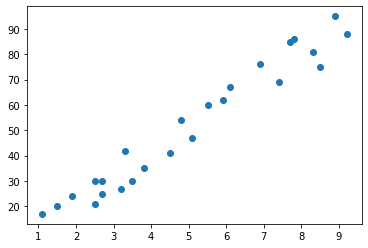

In [21]:
plt.scatter(x=df['Hours'],y=df['Scores'])

In [26]:
x=df['Hours']
y=df['Scores']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print('train shapes: ',x_train.shape,y_train.shape)
print('test shapes: ',x_test.shape,y_test.shape)

train shapes:  (20,) (20,)
test shapes:  (5,) (5,)


In [31]:
xc = sm.add_constant(x)
xc                                                   ### not required for scikit learn

,const,Hours
0,1.0,2.5
1,1.0,5.1
2,1.0,3.2
3,1.0,8.5
4,1.0,3.5
5,1.0,1.5
6,1.0,9.2
7,1.0,5.5
8,1.0,8.3
9,1.0,2.7


In [32]:
model1=sm.OLS(y,xc).fit()                        
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           9.13e-17
Time:                        00:35:48   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
b0=model1.params[0]
b1=model1.params[1]
print(b0,b1)

2.4836734053731675 9.775803390787472


In [36]:
y_pred=model1.predict()
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

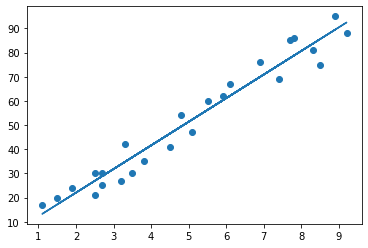

In [42]:
b0=2.35
b1=0.808
##y_pred=b0+b1*x
plt.scatter(x,y)
plt.plot(x,y_pred)

In [38]:
y_bar=y.mean()

sst=np.sum((y-y_bar)**2)
ssr=np.sum((y_pred-y_bar)**2)
sse=np.sum((y-y_pred)**2)

print('SST',sst)
print('SSR',ssr)
print('SSE',sse)

print('SSR+SSE',ssr+sse)

SST 15346.24
SSR 14624.171737268864
SSE 722.0682627311367
SSR+SSE 15346.24


In [39]:
r2=ssr/sst
print('R2: ',r2)  

R2:  0.9529481969048356


# Thank You.......